### Import Libraries:

In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

### Read the Dataset:

In [207]:
train = pd.read_csv("sample_train.csv")
#test = pd.read_csv("2018-05-17 - Recruit Sample Data Test.csv")
train.head()

,SetID,Time of Application,State,Monthly Net Income,Paycheck Net Income,Rent or Own,Months at Residence,Bank Account Months,Pay Cycle,Loan Amount,Loan Funded Date,Loan Due Date,First Payment Default
0,436,2018-03-28T17:27:35Z,CA,2000.0,2000.0,R,12,6,Monthly,300.00,2018-03-28,2018-04-11,False
1,615,2018-03-23T13:19:32Z,TX,3500.0,3500.0,R,60,60,Monthly,641.91,2018-03-23,2018-04-06,False
2,1251,2018-02-28T12:04:56Z,CA,3000.0,3000.0,R,0,6,Monthly,117.65,2018-02-28,2018-03-30,True
3,440,2018-03-28T15:47:59Z,CA,1500.0,1500.0,R,12,6,Monthly,117.65,2018-03-28,2018-04-28,False
4,1692,2018-02-13T04:36:00Z,CA,2392.0,598.0,R,130,36,Weekly,300.00,2018-02-13,2018-02-23,False


In [208]:
### Rename the columns:

In [210]:
train.rename(columns={'First Payment Default': 'First_Payment_Default',
                   'Loan Due Date': 'Loan_Due_Date',
                  'Loan Funded Date': 'Loan_Funded_Date',
                  'Pay Cycle': 'Pay_Cycle',
                  'Rent or Own': 'Rent_or_Own',
                  'Bank Account Months': 'Bank_Account_Months',
                  'Loan Amount': 'Loan_Amount',
                  'Monthly Net Income': 'Monthly_Net_Income',
                  'Months at Residence': 'Months_at_Residence',
                  'Paycheck Net Income': 'Paycheck_Net_Income'}, inplace=True)

In [211]:
train.shape

(1600, 13)

In [213]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 13 columns):
SetID                    1600 non-null int64
Time of Application      1600 non-null object
State                    1600 non-null object
Monthly_Net_Income       1600 non-null float64
Paycheck_Net_Income      1600 non-null float64
Rent_or_Own              1600 non-null object
Months_at_Residence      1600 non-null int64
Bank_Account_Months      1600 non-null int64
Pay_Cycle                1600 non-null object
Loan_Amount              1600 non-null float64
Loan_Funded_Date         1600 non-null object
Loan_Due_Date            1600 non-null object
First_Payment_Default    1600 non-null bool
dtypes: bool(1), float64(3), int64(3), object(6)
memory usage: 151.6+ KB


### Convert Object type to Datetime and extract Month, Day and Hour:

In [214]:
train["Time_of_application"] = pd.to_datetime(train['Time of Application'])

In [215]:
## Drop the original 'Time of Application' column
train = train.drop(['Time of Application'], axis =1)

In [216]:
train['Month_only']= train['Time_of_application'].dt.month
train['Day_only']= train['Time_of_application'].dt.day
train['Hour_only']= train['Time_of_application'].dt.hour

In [217]:
train.head(2)

,SetID,State,Monthly_Net_Income,Paycheck_Net_Income,Rent_or_Own,Months_at_Residence,Bank_Account_Months,Pay_Cycle,Loan_Amount,Loan_Funded_Date,Loan_Due_Date,First_Payment_Default,Time_of_application,Month_only,Day_only,Hour_only
0,436,CA,2000.0,2000.0,R,12,6,Monthly,300.00,2018-03-28,2018-04-11,False,2018-03-28 17:27:35+00:00,3,28,17
1,615,TX,3500.0,3500.0,R,60,60,Monthly,641.91,2018-03-23,2018-04-06,False,2018-03-23 13:19:32+00:00,3,23,13


### Flag Variable:

In [218]:
train['time_part_only']= pd.to_datetime(train['Time_of_application'], format = '%H:%M:%S').dt.time.astype(str)
train['application_time_flag']= train['time_part_only'].apply(lambda x: 1 if x >= '08:00:00' and x <= '18:00:00' else (0))

In [219]:
# drop time_part_only column
train = train.drop(['time_part_only'], axis =1)

In [220]:
train['application_time_flag'].value_counts()

1    1249
0     351
Name: application_time_flag, dtype: int64

### Data Pre Processing:

#### Check for Duplicates ID:

In [221]:
### Check for Duplicates ID:
counts = train['SetID'].value_counts()
train[train['SetID'].isin(counts.index[counts > 1])]

,SetID,State,Monthly_Net_Income,Paycheck_Net_Income,Rent_or_Own,Months_at_Residence,Bank_Account_Months,Pay_Cycle,Loan_Amount,Loan_Funded_Date,Loan_Due_Date,First_Payment_Default,Time_of_application,Month_only,Day_only,Hour_only,application_time_flag


This shows that we dont have any duplicates ID in the dataset, therefore ID is the unique key on the givendataset.

#### Missing value assesment :

In [222]:
# check missing values in train data
train.isnull().sum()

SetID                    0
State                    0
Monthly_Net_Income       0
Paycheck_Net_Income      0
Rent_or_Own              0
Months_at_Residence      0
Bank_Account_Months      0
Pay_Cycle                0
Loan_Amount              0
Loan_Funded_Date         0
Loan_Due_Date            0
First_Payment_Default    0
Time_of_application      0
Month_only               0
Day_only                 0
Hour_only                0
application_time_flag    0
dtype: int64

This clearly shows that there is no any missing values in the given dataset.

In [223]:
train['Day_only'].value_counts()

5     124
12     85
9      83
26     76
8      73
2      73
14     71
1      69
27     68
13     66
15     62
20     61
6      60
3      59
22     57
28     53
4      51
7      50
19     47
23     44
21     42
31     37
29     31
25     27
16     25
24     22
10     21
30     21
17     18
18     14
11     10
Name: Day_only, dtype: int64

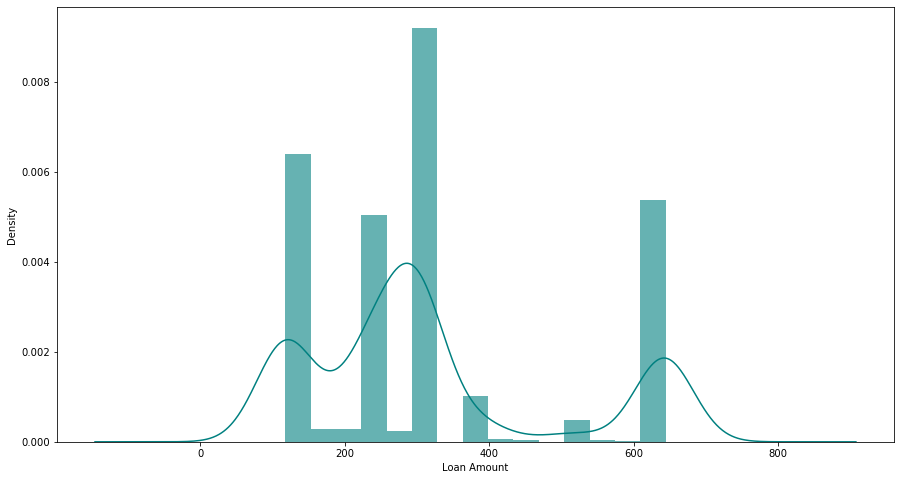

In [226]:
plt.figure(figsize=(15,8))
ax = train["Loan_Amount"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train["Loan_Amount"].plot(kind='density', color='teal')
ax.set(xlabel='Loan Amount')
plt.show()

### Dependent Variable Distribution:

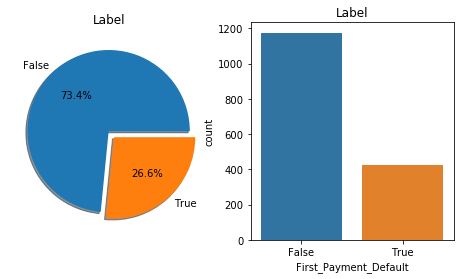

In [227]:
f,ax = plt.subplots(1,2, figsize= (8,4))
train['First_Payment_Default'].value_counts().plot.pie(explode=[0,0.1], autopct = '%1.1f%%', ax= ax[0], shadow= True)
ax[0].set_title("Label")
ax[0].set_ylabel('')
sns.countplot('First_Payment_Default', data = train, ax= ax[1])
ax[1].set_title('Label')
plt.show()

we observed that distribution of classes (False/True) is skewed so we need to do stratified sampling approach while training the model.

### Correlation between Continuous Variables:

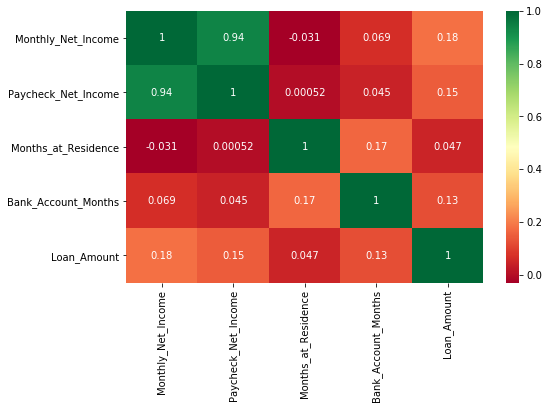

In [228]:
continuous_features = ['Monthly_Net_Income', 'Paycheck_Net_Income', 'Months_at_Residence', 'Bank_Account_Months', 'Loan_Amount']
X = train[continuous_features]

plt.subplots(figsize=(8, 5))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

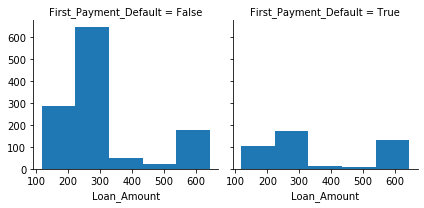

In [229]:
g = sns.FacetGrid(train, col='First_Payment_Default')
g.map(plt.hist, 'Loan_Amount', bins=5)

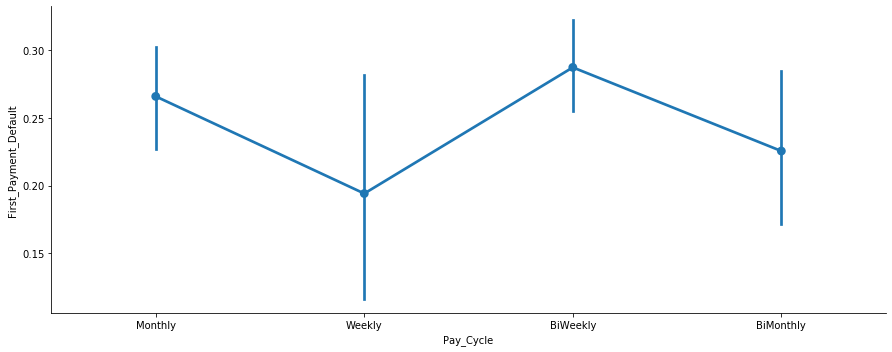

In [231]:
axes = sns.factorplot('Pay_Cycle','First_Payment_Default', data=train, aspect = 2.5, )

### Outlier Detection:

In [232]:
### Box Plot Here

### Create the list of Columns Family:

In [233]:
train.dtypes

SetID                                  int64
State                                 object
Monthly_Net_Income                   float64
Paycheck_Net_Income                  float64
Rent_or_Own                           object
Months_at_Residence                    int64
Bank_Account_Months                    int64
Pay_Cycle                             object
Loan_Amount                          float64
Loan_Funded_Date                      object
Loan_Due_Date                         object
First_Payment_Default                   bool
Time_of_application      datetime64[ns, UTC]
Month_only                             int64
Day_only                               int64
Hour_only                              int64
application_time_flag                  int64
dtype: object

In [234]:
ID_col = ['SetID']
target_col = ['First_Payment_Default']
cat_cols = ['State', 'Rent_or_Own','Pay_Cycle','application_time_flag']
date_cols = ['Loan_Funded_Date','Loan_Due_Date','Time_of_application']
num_cols = list(set(list(train.columns))- set(cat_cols)-set(ID_col)-set(target_col)-set(date_cols))

In [235]:
num_cols

['Day_only',
 'Month_only',
 'Hour_only',
 'Loan_Amount',
 'Paycheck_Net_Income',
 'Monthly_Net_Income',
 'Months_at_Residence',
 'Bank_Account_Months']

In [236]:
### combined numerical and categorical cols
num_cat_cols = num_cols + cat_cols

In [237]:
num_cat_cols

['Day_only',
 'Month_only',
 'Hour_only',
 'Loan_Amount',
 'Paycheck_Net_Income',
 'Monthly_Net_Income',
 'Months_at_Residence',
 'Bank_Account_Months',
 'State',
 'Rent_or_Own',
 'Pay_Cycle',
 'application_time_flag']

### Rescaling:

In [239]:
cols_normalize = train.columns.difference(['SetID','Loan_Funded_Date','Loan_Due_Date','Time_of_application','State', 
                                           'Rent_or_Own','Pay_Cycle','First_Payment_Default'])

cols_normalize

Index(['Bank_Account_Months', 'Day_only', 'Hour_only', 'Loan_Amount',
       'Month_only', 'Monthly_Net_Income', 'Months_at_Residence',
       'Paycheck_Net_Income', 'application_time_flag'],
      dtype='object')

In [240]:
min_max_scaler = preprocessing.MinMaxScaler()
norm_train_df = pd.DataFrame(min_max_scaler.fit_transform(train[cols_normalize]), columns= cols_normalize, index= train.index)
train_df = pd.concat([train[train.columns.difference(cols_normalize)], norm_train_df], axis =1)

In [241]:
train_df.head()

,First_Payment_Default,Loan_Due_Date,Loan_Funded_Date,Pay_Cycle,Rent_or_Own,SetID,State,Time_of_application,Bank_Account_Months,Day_only,Hour_only,Loan_Amount,Month_only,Monthly_Net_Income,Months_at_Residence,Paycheck_Net_Income,application_time_flag
0,False,2018-04-11,2018-03-28,Monthly,R,436,CA,2018-03-28 17:27:35+00:00,0.007371,0.900000,0.739130,0.346285,0.666667,0.010493,0.017391,0.010493,1.0
1,False,2018-04-06,2018-03-23,Monthly,R,615,TX,2018-03-23 13:19:32+00:00,0.140049,0.733333,0.565217,0.995575,0.666667,0.018648,0.086957,0.018648,1.0
2,True,2018-03-30,2018-02-28,Monthly,R,1251,CA,2018-02-28 12:04:56+00:00,0.007371,0.900000,0.521739,0.000000,0.333333,0.015930,0.000000,0.015930,1.0
3,False,2018-04-28,2018-03-28,Monthly,R,440,CA,2018-03-28 15:47:59+00:00,0.007371,0.900000,0.652174,0.000000,0.666667,0.007775,0.017391,0.007775,1.0
4,False,2018-02-23,2018-02-13,Weekly,R,1692,CA,2018-02-13 04:36:00+00:00,0.081081,0.400000,0.173913,0.346285,0.333333,0.012624,0.188406,0.002871,0.0


### Label Encoding and One Hot Encoding:

       Label encoding is the approach to encode categorical values. Label encoding is simply converting each value in a column to a number. Th disadvantage of label encoding is that numeric value can ve misinterpreted by algorithms. For example, the value 0 is obviously less than 2 but does not really mean the same on the dataset. In order to mitigate this issue,we will do one hot encoding on the variables.

In [242]:
train_df = pd.get_dummies(train_df, columns = ['State', 'Rent_or_Own','Pay_Cycle','application_time_flag'], 
                          prefix = ['State', 'Rent_or_Own','Pay_Cycle','application_time_flag'])

In [243]:
train_df.head()

,First_Payment_Default,Loan_Due_Date,Loan_Funded_Date,SetID,Time_of_application,Bank_Account_Months,Day_only,Hour_only,Loan_Amount,Month_only,Monthly_Net_Income,Months_at_Residence,Paycheck_Net_Income,State_CA,State_TX,Rent_or_Own_O,Rent_or_Own_R,Pay_Cycle_BiMonthly,Pay_Cycle_BiWeekly,Pay_Cycle_Monthly,Pay_Cycle_Weekly,application_time_flag_0.0,application_time_flag_1.0
0,False,2018-04-11,2018-03-28,436,2018-03-28 17:27:35+00:00,0.007371,0.900000,0.739130,0.346285,0.666667,0.010493,0.017391,0.010493,1,0,0,1,0,0,1,0,0,1
1,False,2018-04-06,2018-03-23,615,2018-03-23 13:19:32+00:00,0.140049,0.733333,0.565217,0.995575,0.666667,0.018648,0.086957,0.018648,0,1,0,1,0,0,1,0,0,1
2,True,2018-03-30,2018-02-28,1251,2018-02-28 12:04:56+00:00,0.007371,0.900000,0.521739,0.000000,0.333333,0.015930,0.000000,0.015930,1,0,0,1,0,0,1,0,0,1
3,False,2018-04-28,2018-03-28,440,2018-03-28 15:47:59+00:00,0.007371,0.900000,0.652174,0.000000,0.666667,0.007775,0.017391,0.007775,1,0,0,1,0,0,1,0,0,1
4,False,2018-02-23,2018-02-13,1692,2018-02-13 04:36:00+00:00,0.081081,0.400000,0.173913,0.346285,0.333333,0.012624,0.188406,0.002871,1,0,0,1,0,0,0,1,1,0


### Encode Target Variable:

In [315]:
from sklearn.preprocessing import LabelEncoder
for var in target_col:
    number = LabelEncoder()
    train_df[var] = number.fit_transform(train_df[var].astype('category'))

In [316]:
train_df.head()

,First_Payment_Default,Loan_Due_Date,Loan_Funded_Date,SetID,Time_of_application,Bank_Account_Months,Day_only,Hour_only,Loan_Amount,Month_only,Monthly_Net_Income,Months_at_Residence,Paycheck_Net_Income,State_CA,State_TX,Rent_or_Own_O,Rent_or_Own_R,Pay_Cycle_BiMonthly,Pay_Cycle_BiWeekly,Pay_Cycle_Monthly,Pay_Cycle_Weekly,application_time_flag_0.0,application_time_flag_1.0
0,0,2018-04-11,2018-03-28,436,2018-03-28 17:27:35+00:00,0.007371,0.900000,0.739130,0.346285,0.666667,0.010493,0.017391,0.010493,1,0,0,1,0,0,1,0,0,1
1,0,2018-04-06,2018-03-23,615,2018-03-23 13:19:32+00:00,0.140049,0.733333,0.565217,0.995575,0.666667,0.018648,0.086957,0.018648,0,1,0,1,0,0,1,0,0,1
2,1,2018-03-30,2018-02-28,1251,2018-02-28 12:04:56+00:00,0.007371,0.900000,0.521739,0.000000,0.333333,0.015930,0.000000,0.015930,1,0,0,1,0,0,1,0,0,1
3,0,2018-04-28,2018-03-28,440,2018-03-28 15:47:59+00:00,0.007371,0.900000,0.652174,0.000000,0.666667,0.007775,0.017391,0.007775,1,0,0,1,0,0,1,0,0,1
4,0,2018-02-23,2018-02-13,1692,2018-02-13 04:36:00+00:00,0.081081,0.400000,0.173913,0.346285,0.333333,0.012624,0.188406,0.002871,1,0,0,1,0,0,0,1,1,0


### Train and Test Split (Stratified Sampling)

In [364]:
### Create a dataframe with all training data except the target column 
train_X = train_df.drop(['Loan_Due_Date','Loan_Funded_Date','SetID','Time_of_application','First_Payment_Default'], axis =1)

In [365]:
### Create a dataframe with only the target column
train_y = train_df['First_Payment_Default'].values
train_y

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [366]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_X, 
                                                    train_y,
                                                   # stratify = train_y,
                                                    test_size=0.3, random_state=12)

In [367]:
print (X_train.shape)
print (X_test.shape)

(1120, 18)
(480, 18)


## 1.  Logistic Regression

In [368]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_curve, average_precision_score, f1_score, auc
#Fit the model 
logisticRegr = LogisticRegression()
logisticRegr = logisticRegr.fit(X_train,y_train)

# predict probabilities 
probs = logisticRegr.predict_proba(X_test)

## Keep Probabilities for the positive outcome only 
probs = probs[:,1]

## Test Data Accuracy 
yhat = logisticRegr.predict(X_test)
accuracy_score(y_test, yhat)

## Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, probs)

## Calculate F1 Score 
f1= f1_score(y_test, yhat)

## Calculate precison recall auc
auc = auc (recall, precision)

## Calculate average precision score 
ap = average_precision_score(y_test, probs)
print('f1=%.3f auc = %.3f, ap = %.3f' % (f1, auc, ap))

f1=0.000 auc = 0.311, ap = 0.316


C:\Users\Biswash\Anaconda3\envs\py3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Biswash\Anaconda3\envs\py3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


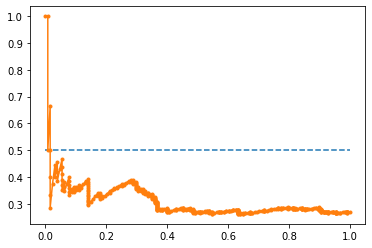

In [369]:
from matplotlib import pyplot

pyplot.plot([0,1], [0.5,0.5], linestyle= '--')
pyplot.plot(recall, precision, marker = '.')
pyplot.show()

AUC: 0.538


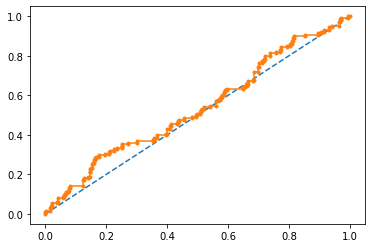

In [370]:
from sklearn.metrics import roc_auc_score, roc_curve
auc = roc_auc_score(y_test, probs)
print ('AUC: %.3f' % auc)

#calculate roc curve 
fpr, tpr, thresholds = roc_curve(y_test, probs)

pyplot.plot([0,1], [0, 1], linestyle= '--')
pyplot.plot(fpr, tpr, marker = '.')
pyplot.show()

### Plot in Training data:

AUC: 0.608


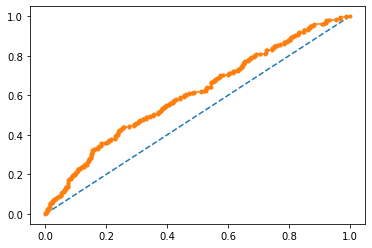

In [371]:
# predict probabilities 
probs1 = logisticRegr.predict_proba(X_train)

## Keep Probabilities for the positive outcome only 
probs1 = probs1[:,1]

from sklearn.metrics import roc_auc_score, roc_curve
auc = roc_auc_score(y_train, probs1)
print ('AUC: %.3f' % auc)

#calculate roc curve 
fpr, tpr, thresholds = roc_curve(y_train, probs1)

pyplot.plot([0,1], [0, 1], linestyle= '--')
pyplot.plot(fpr, tpr, marker = '.')
pyplot.show()

In [372]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, yhat)
cnf_matrix

array([[352,   0],
       [128,   0]], dtype=int64)

## 2. Decision Tree

In [373]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, precision_recall_curve, average_precision_score, f1_score, auc
#Fit the model 
logisticRegr = ExtraTreesClassifier()
logisticRegr = logisticRegr.fit(X_train,y_train)

# predict probabilities 
probs = logisticRegr.predict_proba(X_test)

## Keep Probabilities for the positive outcome only 
probs = probs[:,1]

## Test Data Accuracy 
yhat = logisticRegr.predict(X_test)
accuracy_score(y_test, yhat)

## Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, probs)

## Calculate F1 Score 
f1= f1_score(y_test, yhat)

## Calculate precison recall auc
auc = auc (recall, precision)

## Calculate average precision score 
ap = average_precision_score(y_test, probs)
print('f1=%.3f auc = %.3f, ap = %.3f' % (f1, auc, ap))

f1=0.273 auc = 0.398, ap = 0.379


C:\Users\Biswash\Anaconda3\envs\py3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


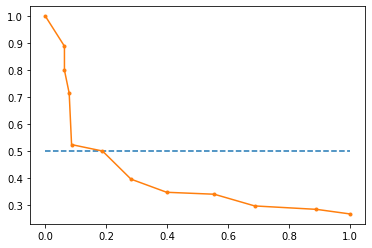

In [374]:
from matplotlib import pyplot

pyplot.plot([0,1], [0.5,0.5], linestyle= '--')
pyplot.plot(recall, precision, marker = '.')
pyplot.show()

AUC: 0.599


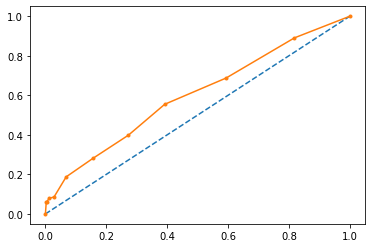

In [375]:
from sklearn.metrics import roc_auc_score, roc_curve
auc = roc_auc_score(y_test, probs)
print ('AUC: %.3f' % auc)

#calculate roc curve 
fpr, tpr, thresholds = roc_curve(y_test, probs)

pyplot.plot([0,1], [0, 1], linestyle= '--')
pyplot.plot(fpr, tpr, marker = '.')
pyplot.show()

## 3. Random Forest

In [376]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
rf.fit(X_train,y_train)
print('Accuracy of RF on training data: {}'.format(rf.score(X_train, y_train)))
rf=rf.score(X_test, y_test)
rf

Accuracy of RF on training data: 1.0


0.7416666666666667

## 4. Support Vector Machine (SVM)

In [334]:
from sklearn.svm import LinearSVC
svm_linear = LinearSVC(penalty ='l1', dual =False)
svm_linear.fit(X_train, y_train)
print('Accuracy of SVM_Linear on training data: {}'.format(svm_linear.score(X_train, y_train)))
svm=svm_linear.score(X_test, y_test)
svm

Accuracy of SVM_Linear on training data: 0.7348214285714286


C:\Users\Biswash\Anaconda3\envs\py3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.7291666666666666

## 5. SVM Radial 

In [335]:
from sklearn.svm import SVC
svm_radial = SVC(kernel='rbf')
svm_radial.fit(X_train, y_train)
Y_pred = svm_radial.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,Y_pred))  
print(classification_report(y_test,Y_pred))

[[352   0]
 [128   0]]
              precision    recall  f1-score   support

           0       0.73      1.00      0.85       352
           1       0.00      0.00      0.00       128

    accuracy                           0.73       480
   macro avg       0.37      0.50      0.42       480
weighted avg       0.54      0.73      0.62       480



C:\Users\Biswash\Anaconda3\envs\py3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Biswash\Anaconda3\envs\py3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [336]:
svmr=svm_radial.score(X_test, y_test)
svmr

0.7333333333333333

In [339]:
models = pd.DataFrame({
    'Model': ['Random Forest','Support Vector Machines',"SVM Radial" ],
    'Score': [ rf, svm, svmr]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,SVM Radial,0.733333
1,Support Vector Machines,0.729167
0,Random Forest,0.716667


## Overall, Accuracy of SVM Radial is best(75%)

## Prediction on Test data

In [429]:
predictedData  = pd.read_csv("2018-05-17 - Recruit Sample Data Test.csv")
predictedData.head()

,SetID,Time of Application,State,Monthly Net Income,Paycheck Net Income,Rent or Own,Months at Residence,Bank Account Months,Pay Cycle,Loan Amount,Loan Funded Date,Loan Due Date,Time_Diff
0,1,2018-04-09T23:25:18Z,CA,1894.0,947.0,R,8,30,BiWeekly,300.00,4/10/2018,4/20/2018,10
1,4,2018-04-09T20:34:56Z,TX,5000.0,5000.0,O,36,36,Monthly,642.46,4/10/2018,4/27/2018,17
2,14,2018-04-09T17:41:37Z,TX,2500.0,2500.0,O,108,6,Monthly,644.24,4/9/2018,5/10/2018,31
3,19,2018-04-09T16:33:35Z,CA,2902.0,1451.0,R,48,36,BiWeekly,300.00,4/9/2018,4/20/2018,11
4,28,2018-04-09T14:51:15Z,CA,5000.0,5000.0,R,12,12,Monthly,235.30,4/9/2018,4/30/2018,21


In [430]:
test = predictedData

In [431]:
test.columns

Index(['SetID', 'Time of Application', 'State', 'Monthly Net Income',
       'Paycheck Net Income', 'Rent or Own', 'Months at Residence',
       'Bank Account Months', 'Pay Cycle', 'Loan Amount', 'Loan Funded Date',
       'Loan Due Date', 'Time_Diff'],
      dtype='object')

In [434]:
test=test[['Monthly Net Income','Rent or Own','Months at Residence','Bank Account Months','Pay Cycle','Loan Amount','Time_Diff']] 

In [438]:
test.columns=['MonthlyNetIncome','RentOrOwn','MonthsAtResidence','BankAccountMonths', 'PayCycle', 'LoanAmount','Time_Diff']

In [439]:
mymap1 ={'R':1, 'O':'2', 'Weekly':1,'BiWeekly':2,'Monthly':3,'BiMonthly':4}
test = test.applymap(lambda s: mymap1.get(s) if s in mymap1 else s)
test.head()

,MonthlyNetIncome,RentOrOwn,MonthsAtResidence,BankAccountMonths,PayCycle,LoanAmount,Time_Diff
0,1894.0,1,8,30,2,300.00,10
1,5000.0,2,36,36,3,642.46,17
2,2500.0,2,108,6,3,644.24,31
3,2902.0,1,48,36,2,300.00,11
4,5000.0,1,12,12,3,235.30,21


In [440]:
Y = test

## SVM Radial for Prediction

In [441]:
predictedData['FirstPaymentDefault'] = svm_radial.predict(Y)
predictedData.head(10)

,SetID,Time of Application,State,Monthly Net Income,Paycheck Net Income,Rent or Own,Months at Residence,Bank Account Months,Pay Cycle,Loan Amount,Loan Funded Date,Loan Due Date,Time_Diff,FirstPaymentDefault
0,1,2018-04-09T23:25:18Z,CA,1894.0,947.0,R,8,30,BiWeekly,300.00,4/10/2018,4/20/2018,10,0
1,4,2018-04-09T20:34:56Z,TX,5000.0,5000.0,O,36,36,Monthly,642.46,4/10/2018,4/27/2018,17,0
2,14,2018-04-09T17:41:37Z,TX,2500.0,2500.0,O,108,6,Monthly,644.24,4/9/2018,5/10/2018,31,0
3,19,2018-04-09T16:33:35Z,CA,2902.0,1451.0,R,48,36,BiWeekly,300.00,4/9/2018,4/20/2018,11,0
4,28,2018-04-09T14:51:15Z,CA,5000.0,5000.0,R,12,12,Monthly,235.30,4/9/2018,4/30/2018,21,0
5,37,2018-04-09T13:01:38Z,CA,3500.0,1750.0,R,12,12,BiMonthly,300.00,4/9/2018,4/25/2018,16,0
6,41,2018-04-09T12:02:01Z,CA,3000.0,1500.0,R,120,30,BiMonthly,235.30,4/9/2018,4/27/2018,18,0
7,45,2018-04-09T11:37:54Z,CA,5000.0,2500.0,O,108,6,BiWeekly,117.65,4/9/2018,4/18/2018,9,0
8,46,2018-04-09T11:34:34Z,CA,1820.0,910.0,R,12,36,BiWeekly,117.65,4/9/2018,4/27/2018,18,0
9,51,2018-04-09T11:06:47Z,TX,3000.0,3000.0,R,24,24,Monthly,641.91,4/9/2018,4/23/2018,14,0


In [443]:
mymap ={0:False, 1:True}
predictedData= predictedData.applymap(lambda s: mymap.get(s) if s in mymap else s)
predictedData.head(10)

,SetID,Time of Application,State,Monthly Net Income,Paycheck Net Income,Rent or Own,Months at Residence,Bank Account Months,Pay Cycle,Loan Amount,Loan Funded Date,Loan Due Date,Time_Diff,FirstPaymentDefault
0,True,2018-04-09T23:25:18Z,CA,1894.0,947.0,R,8,30,BiWeekly,300.00,4/10/2018,4/20/2018,10,False
1,4,2018-04-09T20:34:56Z,TX,5000.0,5000.0,O,36,36,Monthly,642.46,4/10/2018,4/27/2018,17,False
2,14,2018-04-09T17:41:37Z,TX,2500.0,2500.0,O,108,6,Monthly,644.24,4/9/2018,5/10/2018,31,False
3,19,2018-04-09T16:33:35Z,CA,2902.0,1451.0,R,48,36,BiWeekly,300.00,4/9/2018,4/20/2018,11,False
4,28,2018-04-09T14:51:15Z,CA,5000.0,5000.0,R,12,12,Monthly,235.30,4/9/2018,4/30/2018,21,False
5,37,2018-04-09T13:01:38Z,CA,3500.0,1750.0,R,12,12,BiMonthly,300.00,4/9/2018,4/25/2018,16,False
6,41,2018-04-09T12:02:01Z,CA,3000.0,1500.0,R,120,30,BiMonthly,235.30,4/9/2018,4/27/2018,18,False
7,45,2018-04-09T11:37:54Z,CA,5000.0,2500.0,O,108,6,BiWeekly,117.65,4/9/2018,4/18/2018,9,False
8,46,2018-04-09T11:34:34Z,CA,1820.0,910.0,R,12,36,BiWeekly,117.65,4/9/2018,4/27/2018,18,False
9,51,2018-04-09T11:06:47Z,TX,3000.0,3000.0,R,24,24,Monthly,641.91,4/9/2018,4/23/2018,14,False


In [446]:
predictedData['FirstPaymentDefault'].value_counts()

False    395
True       5
Name: FirstPaymentDefault, dtype: int64

###  Hence in test data set there are 395 True and and 5 False predictions using SVM Radial model.